<a href="https://colab.research.google.com/github/mafaldasalomao/ocr_recognition/blob/main/OCR_com_EasyOCR_e_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de texto com EasyOCR

- Mantida por por [Jaided AI](https://jaided.ai/), uma empresa especializada em serviços de OCR
- Repositório oficial: https://github.com/JaidedAI/EasyOCR

# Instalação

In [7]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opencv_python_headless-4.5.4.60-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.6 MB)


In [ ]:
# Código necessário após atualização do opencv-python-headless no Colab para a versão 4.5.5.62, que não suporta o "_registerMatType".
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.3.0.38

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 10.2 MB/s eta 0:00:00


In [6]:
from easyocr import Reader
import cv2
from google.colab.patches import cv2_imshow
from PIL import ImageFont, ImageDraw, Image
import numpy as np

ImportError: ignored

# Configurações

In [ ]:
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')
print(idiomas)

In [ ]:
gpu = True #@param {type: 'boolean'}

In [ ]:
img = cv2.imread('caneca.jpg')
cv2_imshow(img)

In [ ]:
original = img.copy()

# Reconhecimento (OCR)

In [ ]:
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

In [ ]:
resultados

In [ ]:
resultados[0][0]

# Escrevendo os resultados na imagem

## Texto

In [ ]:
fonte = '/content/calibri.ttf'

In [ ]:
def escreve_texto(texto, x, y, img, fonte, cor=(50,50,255), tamanho = 22):
  fonte = ImageFont.truetype(fonte, tamanho)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho), texto, font = fonte, fill = cor)
  img = np.array(img_pil)
  return img

## Caixa delimitadora 

Cantos da bounding box:
* **te** = topo esquerdo (superior esquerdo)
* **td** = topo direito (superior direito)
* **bd** = baixo direito (inferior direito)
* **be** = baixo esquerdo (inferior esquerdo)

In [ ]:
def coordenada_caixa(caixa):
  (te, td, bd, be) = caixa
  te = (int(te[0]), int(te[1]))
  td = (int(td[0]), int(td[1]))
  bd = (int(bd[0]), int(bd[1]))
  be = (int(be[0]), int(be[1]))
  return te, td, bd, be

In [ ]:
coordenada_caixa(resultados[0][0])

In [ ]:
def desenha_caixa(img, te, bd, cor_caixa=(200,255,0), espessura=2):
  cv2.rectangle(img, te, bd, cor_caixa, espessura)
  return img

In [ ]:
img = original.copy()
for (caixa, texto, probabilidade) in resultados:
  #print(caixa, texto, probabilidade)
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

In [ ]:
img = cv2.imread('/content/google-cloud.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)

for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

# Outros idiomas

- Outros idiomas [veja aqui](https://www.jaided.ai/easyocr/)

In [ ]:
lista_idiomas = 'en,fr'
idiomas = lista_idiomas.split(',')
idiomas

In [ ]:
img = cv2.imread('/content/frances.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)
resultados

In [ ]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

In [ ]:
lista_idiomas = 'en,ch_sim'
idiomas = lista_idiomas.split(',')
idiomas

In [ ]:
fonte = '/content/simsun.ttc'

In [ ]:
img = cv2.imread('/content/chines.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)
resultados

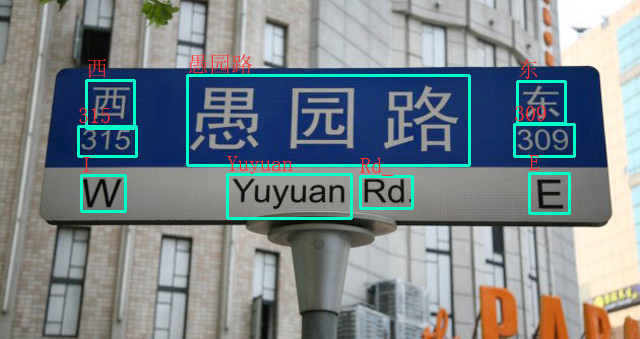

In [ ]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd)
  img = escreve_texto(texto, te[0], te[1], img, fonte)
cv2_imshow(img)

# Texto com fundo

In [ ]:
def fundo_texto(texto, x, y, img, fonte, tamanho=32, cor_fundo=(200,255,0)):
  fundo = np.full((img.shape), (0,0,0), dtype=np.uint8)
  texto_fundo = escreve_texto(texto, x, y, fundo, fonte, tamanho=tamanho)
  texto_fundo = cv2.dilate(texto_fundo,(np.ones((3,5),np.uint8)))
  fx,fy,fw,fh = cv2.boundingRect(texto_fundo[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), cor_fundo, -1) 
  return img

In [ ]:
fonte = '/content/calibri.ttf'
lista_idiomas = 'en,pt'
idiomas = lista_idiomas.split(',')

In [ ]:
img = cv2.imread('/content/placa-infos.jpg')
reader = Reader(idiomas, gpu)
resultados = reader.readtext(img)
resultados

[([[260, 164], [302, 164], [302, 196], [260, 196]], '310', 0.9998522330811639),
 ([[344, 184], [368, 184], [368, 212], [344, 212]], 'i', 0.7931398468144835),
 ([[134, 262], [180, 262], [180, 290], [134, 290]],
  'Cine',
  0.9994775056838989),
 ([[304.07944680100655, 128.69533616120788],
   [366.51745895966945, 117.36831363725129],
   [370.92055319899345, 145.30466383879212],
   [307.48254104033055, 155.6316863627487]],
  'União',
  0.9999735571992951),
 ([[202.01488842937005, 155.701488842937],
   [304.70640266490693, 133.705633508088],
   [309.98511157062995, 157.298511157063],
   [207.29359733509307, 180.294366491912]],
  'Ferroviária',
  0.9996482215261095),
 ([[132.65739357167092, 171.12591485733674],
   [208.5373938916925, 155.3994900067786],
   [214.34260642832908, 182.87408514266326],
   [138.4626061083075, 199.6005099932214]],
  'Estação',
  0.9999682347393094),
 ([[183.7701175612585, 185.99310580513264],
   [261.70640266490693, 174.705633508088],
   [265.2298824387415, 199.006

In [ ]:
cor_fonte = (0,0,0)
cor_fundo = (200,255,0)
cor_caixa = (200,255,0)
tamanho_fonte = 18

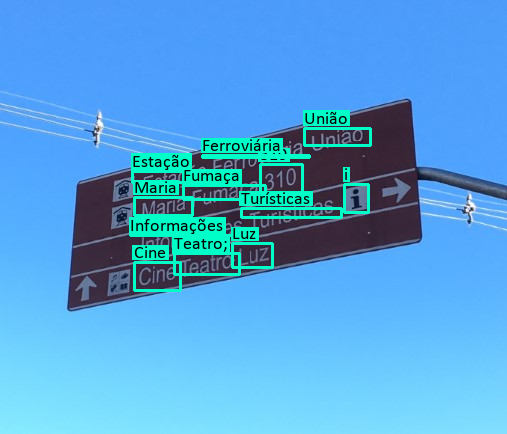

In [ ]:
for (caixa, texto, probabilidade) in resultados:
  te, td, bd, be = coordenada_caixa(caixa)
  img = desenha_caixa(img, te, bd, cor_caixa)
  img = fundo_texto(texto, te[0], te[1], img, fonte, tamanho_fonte, cor_fundo)
  img = escreve_texto(texto, te[0], te[1], img, fonte, cor_fonte, tamanho_fonte)
cv2_imshow(img)